# Create the model and load the trained weights

In [1]:
import torch

from models.models import ResNet

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
model = ResNet(
    in_channels=1,
    layers=[3, 4, 6, 3],
    num_classes=36
).to(device)

state_dict = torch.load(f"artifacts/model1.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [4]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer0): Sequential(
    (0): ResidualBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (conv2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU()
    )
    (1): ResidualBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): Ba

## A function for plotting filters

In [43]:
import matplotlib.pyplot as plt


def plot_filters(image: torch.Tensor, rows: int = 1, cols: int = 5) -> None:
    
    if rows != 1 or cols != 1:
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(9, 9))
        axes = axes.flatten()
        for i in range(rows * cols):
            filters = image.squeeze(0)[i].cpu().detach().numpy()
            axes[i].imshow(filters, cmap='gray')
            axes[i].axis("on")
    else:
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3, 3))
        filters = image.squeeze(0)[0].cpu().detach().numpy()
        axes.imshow(filters, cmap='gray')
        axes.axis("on")
    plt.tight_layout()
    plt.show()

In [33]:
from dataset.dataset_utils import data_loader


_, test_loader = data_loader(batch_size=1)

In [35]:
# get the data, label in test_loader
image, label = next(iter(test_loader))
print(label.item())
image, label = image.to(device), label.to(device)
label.item()

34


34

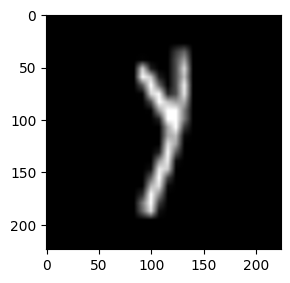

In [44]:
plot_filters(image, 1, 1)

#### (conv1): Sequential(
#### (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
#### (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
#### (2): ReLU()
#### (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
#### )

## Conv 7x7, 64 filters, stride 2

In [41]:
out = model.conv1[0](image)
out.shape

torch.Size([1, 64, 112, 112])

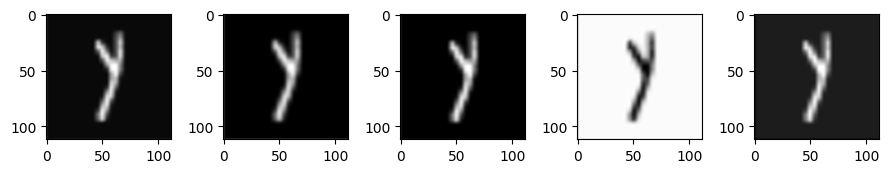

In [45]:
plot_filters(out)

## Max pooling 3x3, stride 2

In [46]:
out = model.conv1[1](out)
out = model.conv1[2](out)
out = model.conv1[3](out)
out.shape

torch.Size([1, 64, 56, 56])

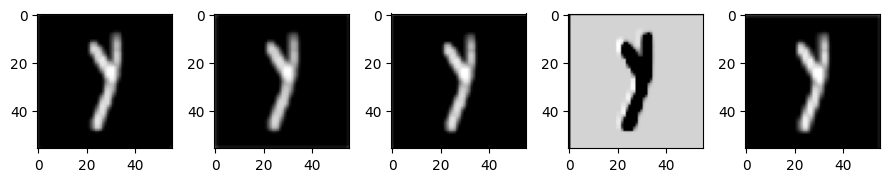

In [47]:
plot_filters(out)

## Layer 0

### Residual 0

In [48]:
out_no = model.layer0[0].conv1(out)
out_no = model.layer0[0].conv2(out)
out_no.shape

torch.Size([1, 64, 56, 56])

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000016D883CC280>
Traceback (most recent call last):
  File "D:\UsingSpace\anaconda3\envs\mlflowenvs\lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "D:\UsingSpace\anaconda3\envs\mlflowenvs\lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


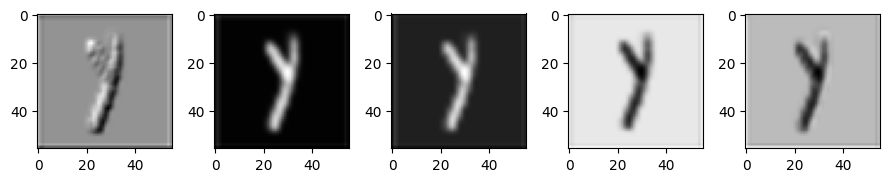

In [49]:
plot_filters(out_no)

In [52]:
out_yes = model.layer0[0](out)
out_yes.shape

torch.Size([1, 64, 56, 56])

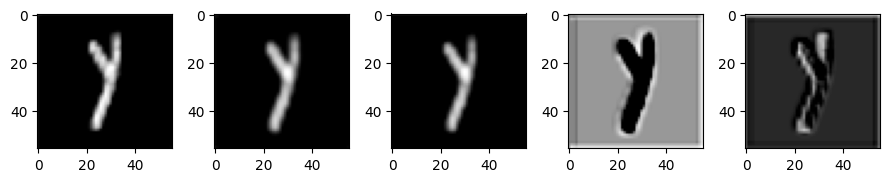

In [53]:
plot_filters(out_yes)

### Residual 1

In [54]:
out = model.layer0[1](out_yes)
out.shape

torch.Size([1, 64, 56, 56])

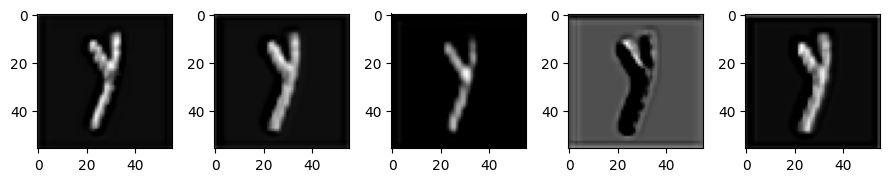

In [55]:
plot_filters(out)

### Residual 2

In [56]:
out = model.layer0[2](out)
out.shape

torch.Size([1, 64, 56, 56])

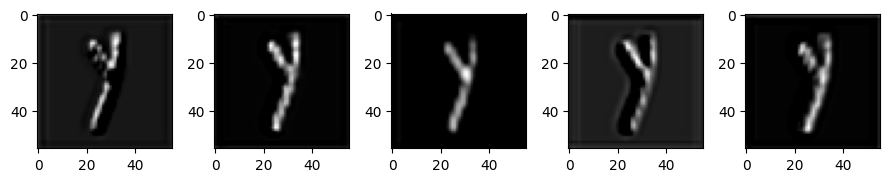

In [57]:
plot_filters(out)

## Layer 1

### Residual 0

In [58]:
out_conv1 = model.layer1[0].conv1(out)
out_conv1.shape

torch.Size([1, 128, 28, 28])

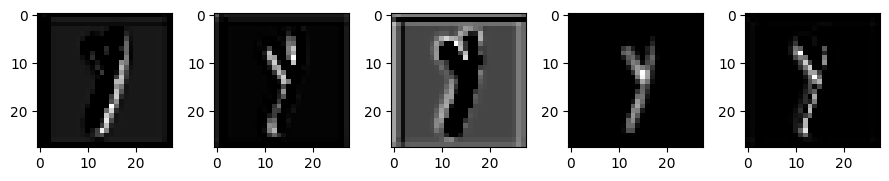

In [59]:
plot_filters(out_conv1)

In [60]:
out = model.layer1[0](out)
out.shape

torch.Size([1, 128, 28, 28])

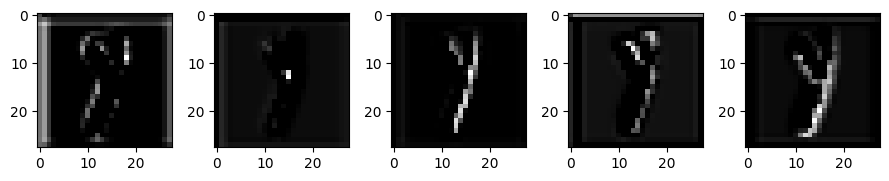

In [61]:
plot_filters(out)

### Residual 1

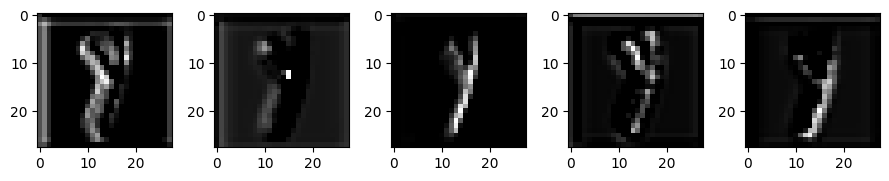

In [62]:
out = model.layer1[1](out)
plot_filters(out)

### Residual 2

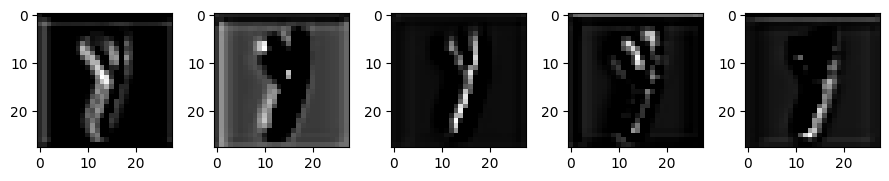

In [63]:
out = model.layer1[2](out)
plot_filters(out)

### Residual 3

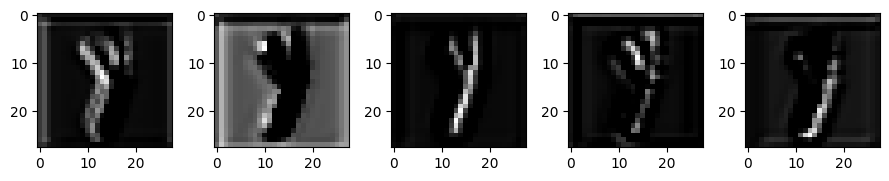

In [64]:
out = model.layer1[3](out)
plot_filters(out)

## Layer 2

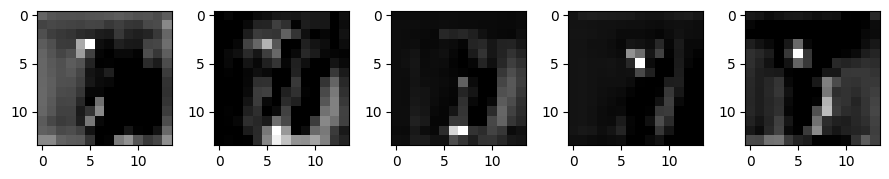

In [65]:
out = model.layer2(out)
plot_filters(out)

## Layer 3

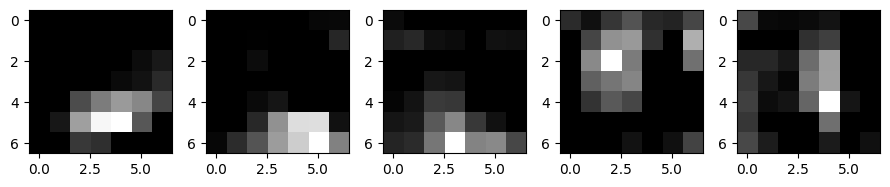

In [66]:
out = model.layer3(out)
plot_filters(out)